# Submission for the AIcrowd Blitz Challenge PKHND

Author - Animesh Sinha

Based off template by - Ayush Shivani

To open this notebook on Google Computing platform Colab, click below!

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aicrowd-bot/005cd2a9231779a260fc4bd96159dff6)


## Comments on the Solution

This is a deterministic solution to playing poker. 

The solution gets a perfect score. The problem is determinisitic and needs not training / Machine Learning.

# Prepare Data

## Download data
The first step is to download out train test data. We will be training a classifier on the train data and make predictions on test data. We submit our predictions


In [0]:
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/test.csv
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/train.zip
!unzip train.zip

--2020-05-09 22:38:19--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/test.csv
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.10, 130.117.252.11, 130.117.252.13, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538694 (526K) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>] 526.07K  --.-KB/s    in 0.02s   

2020-05-09 22:38:19 (21.9 MB/s) - ‘test.csv’ saved [538694/538694]

--2020-05-09 22:38:23--  https://s3.eu-central-1.wasabisys.com/aicrowd-public-datasets/aicrowd_educational_pkhnd/data/public/train.zip
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.16, 130.117.252.13, 130.117.252.10, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.16|:443... connected.
HTTP 


## Import packages

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

## Load Data
We use pandas library to load our data. Pandas loads them into dataframes which helps us analyze our data easily. Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm)

In [0]:
train_data_path = "train.csv" #path where data is stored

In [0]:
train_data = pd.read_csv(train_data_path) #load data in dataframe using pandas

## Visualize data

In [0]:
train_data.head(10)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,label
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
5,1,3,4,5,3,4,1,12,4,6,0
6,2,6,4,11,2,3,4,9,1,7,0
7,3,2,4,9,3,7,4,3,4,5,0
8,4,4,3,13,1,8,3,9,3,10,0
9,1,9,3,8,4,4,1,7,3,5,0


We can see there are 11 column where first 10 column contains the cards information and the last one describing the hand it makes. 1st and 2nd column contains suit and rank of first card respectively, 3rd and 4th column suit and rank of 2nd card and so on.

### Understanding the Distribution

Plotting to check if the hands do appear in the order of expected rarity of the labels were shuffled.

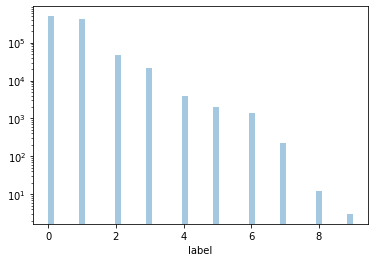

In [0]:
import seaborn as sns
sns.distplot(train_data.label, kde=False).set_yscale('log')

# Core Logic

Defining the function to indentify the hand.

## Implementation

In [0]:
def get_hand_from_row(row):
    index = sorted([row.C1, row.C2, row.C3, row.C4, row.C5])
    suits = set([row.S1, row.S2, row.S3, row.S4, row.S5])
    count_of_index = [index.count(i) for i in range(1, 13 + 1)]

    of_a_kind = 0
    for count in count_of_index:
        if count == 4: of_a_kind = 5
        elif count == 3 and of_a_kind == 1: of_a_kind = 4
        elif count == 2 and of_a_kind == 3: of_a_kind = 4
        elif count == 2 and of_a_kind == 1: of_a_kind = 2
        elif count == 3 and of_a_kind == 0: of_a_kind = 3
        elif count == 2 and of_a_kind == 0: of_a_kind = 1

    flush = len(suits) == 1
    straight = index == [min(index) + i for i in range(5)]
    royal = index == [1, 10, 11, 12, 13]

    if flush and royal: label = 9 # Royal Flush
    elif flush and straight: label = 8 # Straight Flush
    elif of_a_kind == 5: label = 7 # Four of a Kind
    elif of_a_kind == 4: label = 6 # Full House
    elif flush: label = 5 # Flush
    elif straight or royal: label = 4 # Straight
    elif of_a_kind == 3: label = 3 # Three of a Kind
    elif of_a_kind == 2: label = 2 # Two Pairs
    elif of_a_kind == 1: label = 1 # Pair
    else: label = 0 # High Card

    return label

And now we check if our function works perfectly for the entire training dataset.

## Testing

In [0]:
for idx, row in train_data.iterrows():
    if (idx + 1) % 100000 == 0:
        print('.')
    elif (idx + 1) % 1000 == 0:
        print('.', end='') 

    label = get_hand_from_row(row)
    if label != row.label:
        print(label, row.label)
        print(cards)
        if input().strip() != 'y':
            break

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

# Make Final Predictions
We use the same metrics as that will be used for the test set.  
[F1 score](https://en.wikipedia.org/wiki/F1_score) are the metrics for this challenge

## Load Test Set
Load the test data now

In [0]:
final_test_path = "test.csv"
final_test = pd.read_csv(final_test_path)

## Predict Test Set
Time for the moment of truth! Predict on test set and time to make the submission.

In [0]:
submission = []
for idx, row in final_test.iterrows():
    if (idx + 1) % 100000 == 0:
        print('.')
    elif (idx + 1) % 1000 == 0:
        print('.', end='') 

    submission.append(get_hand_from_row(row))

submission = np.array(submission)

.........................

## Save the prediction to csv

In [0]:
submission = pd.DataFrame(submission)
submission.to_csv('/tmp/submission.csv',header=['label'],index=False)

Note: Do take a look at the submission format.The submission file should contain a header.For eg here it is "label". 

## Save it in correct format

To download the generated csv in collab run the below command

In [0]:
from google.colab import files
files.download('/tmp/submission.csv') 

Go to [platform](https://www.aicrowd.com/challenges/aicrowd-blitz-may-2020/problems/pkhnd). Participate in the challenge and submit the submission.csv generated.